Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split



In [49]:
df = pd.read_csv("../../ml_ready_real_estate_data_soft_filled.csv")
df_surface = pd.read_csv("../../Data handled differently/ml_ready_real_estate_data_surface_filled.csv")
print(df.head())
print(df.columns.to_list)

   bedroomCount  bathroomCount  habitableSurface  toiletCount  terraceSurface  \
0           2.0            1.0             100.0          1.0             7.0   
1           2.0            1.0              87.0          1.0             2.0   
2           2.0            2.0             104.0          2.0             3.0   
3           1.0            1.0              71.0          1.0             0.0   
4           2.0            1.0              90.0          1.0             2.0   

   postCode  gardenSurface  province_encoded  type_encoded  subtype_encoded  \
0      1040            0.0               1.0             1                1   
1      1040            0.0               1.0             1                1   
2      1040            0.0               1.0             1                1   
3      1040            0.0               1.0             1                3   
4      1040            0.0               1.0             1                1   

   ...  hasSwimmingPool_encoded  hasFi

In [50]:
geo_df = pd.read_csv("../data/georef-belgium-postal-codes.csv", delimiter=";")
geo_df[['lat', 'lon']] = geo_df['Geo Point'].str.split(',', expand=True)
geo_df['lat'] = geo_df['lat'].astype(float)
geo_df['lon'] = geo_df['lon'].astype(float)

df['postCode'] = df['postCode'].astype(str)
geo_df['postcode'] = geo_df['Post code'].astype(str)

df = df.merge(geo_df[['postcode', 'lat', 'lon']], left_on='postCode', right_on='postcode', how='left')



In [51]:
print(len(df))
df.info()

67880
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67880 entries, 0 to 67879
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bedroomCount                   67880 non-null  float64
 1   bathroomCount                  67880 non-null  float64
 2   habitableSurface               67880 non-null  float64
 3   toiletCount                    67880 non-null  float64
 4   terraceSurface                 67880 non-null  float64
 5   postCode                       67880 non-null  object 
 6   gardenSurface                  67880 non-null  float64
 7   province_encoded               67880 non-null  float64
 8   type_encoded                   67880 non-null  int64  
 9   subtype_encoded                67880 non-null  int64  
 10  epcScore_encoded               57842 non-null  float64
 11  hasAttic_encoded               67880 non-null  int64  
 12  hasGarden_encoded              67880 non

In [52]:
print(len(df_surface))
df_surface.info()

76103
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76103 entries, 0 to 76102
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bedroomCount                   76103 non-null  float64
 1   bathroomCount                  76103 non-null  float64
 2   habitableSurface               76103 non-null  float64
 3   toiletCount                    76103 non-null  float64
 4   postCode                       76103 non-null  int64  
 5   totalParkingCount              76103 non-null  float64
 6   province_encoded               76103 non-null  int64  
 7   type_encoded                   76103 non-null  int64  
 8   subtype_encoded                76103 non-null  int64  
 9   locality_encoded               76103 non-null  float64
 10  epcScore_encoded               76103 non-null  float64
 11  hasAttic_encoded               76103 non-null  int64  
 12  hasGarden_encoded              76103 non

In [53]:
df.describe()

,bedroomCount,bathroomCount,habitableSurface,toiletCount,terraceSurface,gardenSurface,province_encoded,type_encoded,subtype_encoded,epcScore_encoded,...,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price,lat,lon
count,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,57842.000000,...,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000,67880.000000
mean,2.837905,1.268547,157.322245,1.732616,17.615689,198.360961,5.444623,1.553948,3.230952,4.503786,...,0.394166,0.029095,0.174234,0.268194,0.096170,0.104037,0.585519,348706.991824,50.857746,4.325034
std,1.377150,4.441895,770.499246,0.791283,26.273613,845.914692,2.938649,0.497085,3.902532,1.874236,...,0.488674,0.168075,0.379313,0.443022,0.294826,0.305310,0.492636,165544.868155,0.312628,0.791093
min,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9000.000000,49.535082,2.594588
25%,2.000000,1.000000,90.000000,1.000000,4.000000,0.000000,3.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229000.000000,50.679212,3.812267
50%,3.000000,1.000000,131.000000,2.000000,20.000000,95.000000,5.000000,2.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,319000.000000,50.863015,4.375234
75%,3.000000,1.000000,187.000000,2.000000,21.000000,200.000000,7.000000,2.000000,2.000000,6.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,437000.000000,51.103064,4.796492
max,63.000000,1146.000000,185347.000000,32.000000,2921.000000,80000.000000,11.000000,2.000000,24.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,860000.000000,51.472944,6.333485


In [54]:
feature_int=df.select_dtypes(include=['int64']).columns
print(feature_int)

Index(['type_encoded', 'subtype_encoded', 'hasAttic_encoded',
       'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')


In [55]:
feature_float=df.select_dtypes(include=['float64']).columns
print(feature_float)

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'terraceSurface', 'gardenSurface', 'province_encoded',
       'epcScore_encoded', 'price', 'lat', 'lon'],
      dtype='object')


<Axes: >

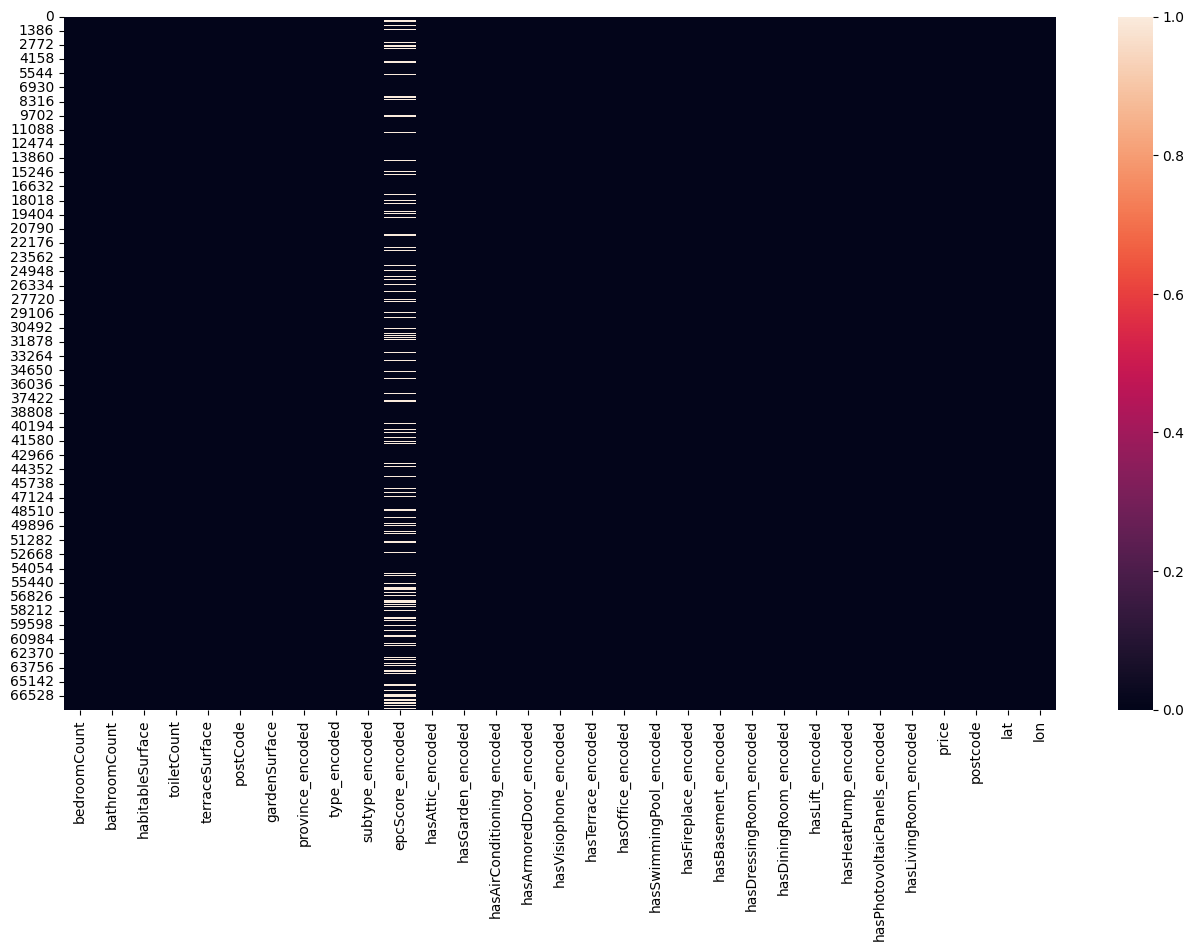

In [56]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [57]:
null_count=df.isnull().sum()

df_origin=df.copy()
null_count

bedroomCount                         0
bathroomCount                        0
habitableSurface                     0
toiletCount                          0
terraceSurface                       0
postCode                             0
gardenSurface                        0
province_encoded                     0
type_encoded                         0
subtype_encoded                      0
epcScore_encoded                 10038
hasAttic_encoded                     0
hasGarden_encoded                    0
hasAirConditioning_encoded           0
hasArmoredDoor_encoded               0
hasVisiophone_encoded                0
hasTerrace_encoded                   0
hasOffice_encoded                    0
hasSwimmingPool_encoded              0
hasFireplace_encoded                 0
hasBasement_encoded                  0
hasDressingRoom_encoded              0
hasDiningRoom_encoded                0
hasLift_encoded                      0
hasHeatPump_encoded                  0
hasPhotovoltaicPanels_enc

In [58]:
epc_mode=df.groupby("subtype_encoded")["epcScore_encoded"].agg(lambda x: x.mode().values[0])
print(epc_mode)

df["epcScore_encoded"] = df["epcScore_encoded"].fillna(df["subtype_encoded"].map(epc_mode))


subtype_encoded
1     6.0
2     2.0
3     6.0
4     6.0
5     6.0
6     6.0
7     4.0
8     5.0
9     5.0
10    5.0
11    6.0
12    5.0
13    5.0
14    6.0
15    1.0
16    4.0
17    7.0
18    7.0
19    2.0
20    2.0
21    2.0
22    2.0
23    1.0
24    2.0
Name: epcScore_encoded, dtype: float64


In [59]:
null_count=df.isnull().sum()
null_count

bedroomCount                     0
bathroomCount                    0
habitableSurface                 0
toiletCount                      0
terraceSurface                   0
postCode                         0
gardenSurface                    0
province_encoded                 0
type_encoded                     0
subtype_encoded                  0
epcScore_encoded                 0
hasAttic_encoded                 0
hasGarden_encoded                0
hasAirConditioning_encoded       0
hasArmoredDoor_encoded           0
hasVisiophone_encoded            0
hasTerrace_encoded               0
hasOffice_encoded                0
hasSwimmingPool_encoded          0
hasFireplace_encoded             0
hasBasement_encoded              0
hasDressingRoom_encoded          0
hasDiningRoom_encoded            0
hasLift_encoded                  0
hasHeatPump_encoded              0
hasPhotovoltaicPanels_encoded    0
hasLivingRoom_encoded            0
price                            0
postcode            

/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_31632/1706791620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_origin, x=feature, palette="Blues")
/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_31632/1706791620.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="Reds")


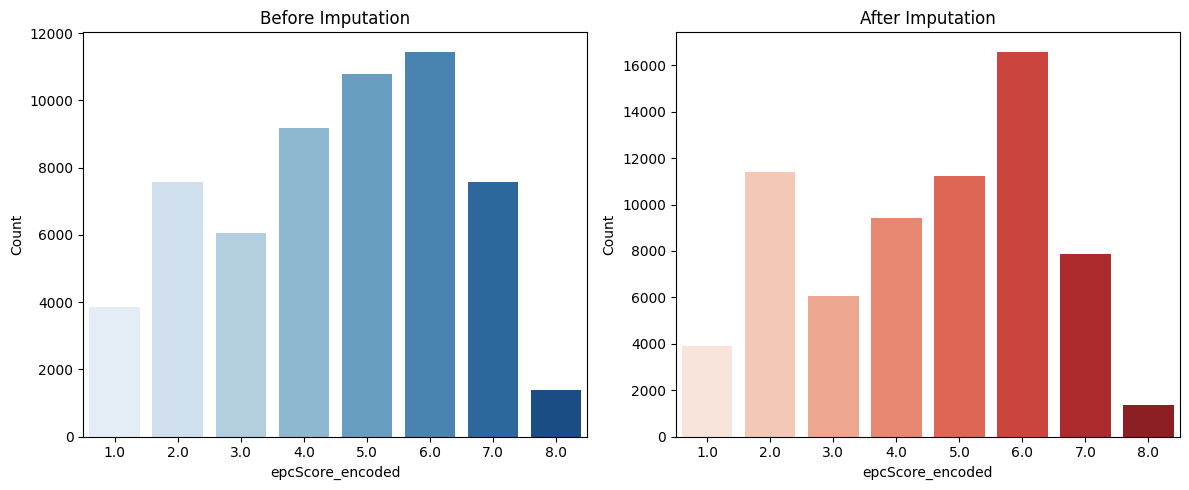

In [60]:


def plot_data(df_origin, df, feature):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(data=df_origin, x=feature, palette="Blues")
    plt.title("Before Imputation")
    plt.xlabel(feature)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=feature, palette="Reds")
    plt.title("After Imputation")
    plt.xlabel(feature)
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

    
plot_data(df_origin, df, "epcScore_encoded")



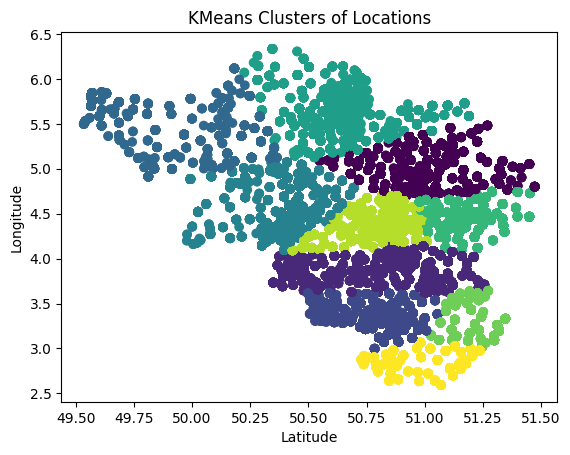

In [61]:
coords = df[['lat', 'lon']]
kmeans = KMeans(n_clusters=10, random_state=42)
df['location_cluster'] = kmeans.fit_predict(coords)


plt.scatter(df['lat'], df['lon'], c=df['location_cluster'],)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KMeans Clusters of Locations')

plt.show()

In [62]:
print(df[['lat', 'lon', 'location_cluster']].head(10))


         lat       lon  location_cluster
0  50.872983  4.375234                 8
1  50.832983  4.394601                 8
2  50.872983  4.375234                 8
3  50.832983  4.394601                 8
4  50.872983  4.375234                 8
5  50.832983  4.394601                 8
6  50.872983  4.375234                 8
7  50.832983  4.394601                 8
8  50.872983  4.375234                 8
9  50.832983  4.394601                 8


In [63]:
numeric_features = ['bedroomCount', 'bathroomCount', 'toiletCount', 'habitableSurface', 'terraceSurface', 'gardenSurface']
binary_features = ['hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded', 'hasArmoredDoor_encoded', 
                   'hasVisiophone_encoded', 'hasTerrace_encoded', 'hasOffice_encoded', 'hasSwimmingPool_encoded', 
                   'hasFireplace_encoded', 'hasBasement_encoded', 'hasDressingRoom_encoded', 'hasDiningRoom_encoded', 
                   'hasLift_encoded', 'hasHeatPump_encoded', 'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded']
categorical_features = ['province_encoded', 'type_encoded', 'subtype_encoded', 'postCode']


for feature in categorical_features:
    df[feature]=df[feature].astype(str)
    
for feature in categorical_features:
    print(f"{feature}: data type = {df[feature].dtype}")

province_encoded: data type = object
type_encoded: data type = object
subtype_encoded: data type = object
postCode: data type = object


In [64]:
print(df.head())

   bedroomCount  bathroomCount  habitableSurface  toiletCount  terraceSurface  \
0           2.0            1.0             100.0          1.0             7.0   
1           2.0            1.0             100.0          1.0             7.0   
2           2.0            1.0              87.0          1.0             2.0   
3           2.0            1.0              87.0          1.0             2.0   
4           2.0            2.0             104.0          2.0             3.0   

  postCode  gardenSurface province_encoded type_encoded subtype_encoded  ...  \
0     1040            0.0              1.0            1               1  ...   
1     1040            0.0              1.0            1               1  ...   
2     1040            0.0              1.0            1               1  ...   
3     1040            0.0              1.0            1               1  ...   
4     1040            0.0              1.0            1               1  ...   

   hasDiningRoom_encoded  hasLif

In [65]:



scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(df[numeric_features])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[-1.15927601 -0.03655627]
 [-1.15927601 -0.03655627]
 [-1.23853261  0.02905823]
 ...
 [-0.68241494  0.02041621]
 [-0.05875469  0.55461318]
 [-0.05438666  0.55738653]]


Split data for training

In [66]:
X = df.drop("price", axis=1)
y = df["price"]

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [67]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print(outliers[['price']])

Number of outliers detected: 2051
          price
10     795000.0
11     795000.0
28     795000.0
29     795000.0
48     795000.0
...         ...
67770  795000.0
67772  795000.0
67785  795000.0
67852  795000.0
67875  849000.0

[2051 rows x 1 columns]


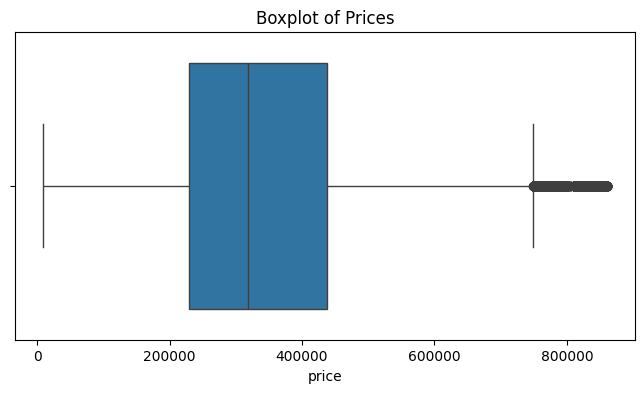

In [68]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Prices')
plt.show()


In [3]:
df_ = pd.read_csv("../data/ml_ready_real_estate_data.csv")
print(df_.head())

   bedroomCount  bathroomCount  habitableSurface  toiletCount  terraceSurface  \
0           2.0            1.0             100.0          1.0             7.0   
1           2.0            1.0              87.0          1.0             2.0   
2           2.0            2.0             104.0          2.0             3.0   
3           1.0            1.0              71.0          1.0             0.0   
4           2.0            1.0              90.0          1.0             2.0   

   postCode  gardenSurface  province_encoded  type_encoded  subtype_encoded  \
0      1040            0.0               1.0             1                1   
1      1040            0.0               1.0             1                1   
2      1040            0.0               1.0             1                1   
3      1040            0.0               1.0             1                3   
4      1040            0.0               1.0             1                1   

   ...  hasSwimmingPool_encoded  hasFi

In [4]:
def add_lat_lon(df: pd.DataFrame) -> pd.DataFrame:
    df["postCode"] = df["postCode"].astype(str)
 
    geo_df = pd.read_csv("../data/georef-belgium-postal-codes.csv", delimiter=";")
    geo_df[["lat", "lon"]] = geo_df["Geo Point"].str.split(",", expand=True)
    geo_df["lat"] = geo_df["lat"].astype(float)
    geo_df["lon"] = geo_df["lon"].astype(float)
    geo_df["postCode"] = geo_df["Post code"].astype(str)
    df = df.merge(geo_df[["postCode", "lat", "lon"]], on="postCode", how="left")
    return df

df_ = add_lat_lon(df_)

print(df_.columns.to_list())
def add_cluster_loc(df: pd.DataFrame) -> pd.DataFrame:
    coords = df[["lat", "lon"]]
    kmeans = KMeans(n_clusters=10, random_state=42)
    df["location_cluster"] = kmeans.fit_predict(coords)
    return df

df_ = add_cluster_loc(df_)


['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount', 'terraceSurface', 'postCode', 'gardenSurface', 'province_encoded', 'type_encoded', 'subtype_encoded', 'epcScore_encoded', 'hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded', 'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded', 'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded', 'hasBasement_encoded', 'hasDressingRoom_encoded', 'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded', 'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded', 'price', 'lat', 'lon']


In [5]:
print(df_.columns.to_list())

['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount', 'terraceSurface', 'postCode', 'gardenSurface', 'province_encoded', 'type_encoded', 'subtype_encoded', 'epcScore_encoded', 'hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded', 'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded', 'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded', 'hasBasement_encoded', 'hasDressingRoom_encoded', 'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded', 'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded', 'price', 'lat', 'lon', 'location_cluster']


In [6]:
from haversine import haversine
def add_location_distances(df: pd.DataFrame) -> pd.DataFrame:
    """add distance columns by using lat, lon to get distance to key location in Belgium"""
    df["lat_lon"] = list(zip(df["lat"], df["lon"]))

    # Coordinates for Brussels and Knokke-Heist
    central_brussels = (50.8465573, 4.351697)
    knokke_heist = (51.346352, 3.285860)

    brussels_distances = []
    knokke_distances = []
    for coord in df["lat_lon"]:
        brussels_distances.append(haversine(central_brussels, coord))
        knokke_distances.append(haversine(knokke_heist, coord))

    df["distance_from_brussels"] = brussels_distances
    df["distance_from_knokke"] = knokke_distances

    df["distance_from_key_location"] = df[
        ["distance_from_brussels", "distance_from_knokke"]
    ].min(axis=1)

    df = df.drop(columns="lat_lon")
    return df

df_ = add_location_distances(df_)

In [7]:
print(df_.columns.to_list())

feature_list = df_.columns.to_list()

['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount', 'terraceSurface', 'postCode', 'gardenSurface', 'province_encoded', 'type_encoded', 'subtype_encoded', 'epcScore_encoded', 'hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded', 'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded', 'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded', 'hasBasement_encoded', 'hasDressingRoom_encoded', 'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded', 'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded', 'price', 'lat', 'lon', 'location_cluster', 'distance_from_brussels', 'distance_from_knokke', 'distance_from_key_location']


In [8]:
epc_mode=df_.groupby("subtype_encoded")["epcScore_encoded"].agg(lambda x: x.mode().values[0])
print(epc_mode)

df_["epcScore_encoded"] = df_["epcScore_encoded"].fillna(df_["subtype_encoded"].map(epc_mode))

subtype_encoded
1     6.0
2     2.0
3     6.0
4     6.0
5     6.0
6     6.0
7     4.0
8     5.0
9     5.0
10    5.0
11    6.0
12    5.0
13    5.0
14    6.0
15    1.0
16    4.0
17    7.0
18    7.0
19    2.0
20    2.0
21    2.0
22    2.0
23    1.0
24    2.0
Name: epcScore_encoded, dtype: float64


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score
import mlflow


from pathlib import Path
from typing import Dict, Any, List
import xgboost as xgb
from sklearn.linear_model import ElasticNet
import optuna

def update_feature_list(feature_list, cols_to_encode, new_cols):
    updated_features = [col for col in feature_list if col not in cols_to_encode]
    updated_features.extend(new_cols)

    return updated_features

def encode_categorical_features(df, feature_list):
    categorical_cols = [
        "province_encoded",
        "type_encoded",
        "subtype_encoded", 
        "postCode",
        "location_cluster",
    ]
    
    cols_to_encode = [col for col in categorical_cols if col in feature_list]

    if cols_to_encode:
        original_cols = set(df.columns)
        df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
        new_cols = [col for col in df.columns if col not in original_cols]
        feature_list = update_feature_list(feature_list, cols_to_encode, new_cols)
    return df, feature_list

def tune_model_optuna(model_name, X_train, y_train, n_trials=100) -> dict:
    """Run hyperparameter tuning with Optuna and return best parameters for each model"""
    
    def objective(trial):
        if model_name == "xgb":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 200),
                "max_depth": trial.suggest_int("max_depth", 3, 7),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
                "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.7),
                "subsample": trial.suggest_float("subsample", 0.6, 1.0),
                "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
                "reg_lambda": trial.suggest_float("reg_lambda", 1, 2),
            }
            model = xgb.XGBRegressor(**params, random_state=42)
            
        elif model_name == "Ridge":
            params = {
                "alpha": trial.suggest_float("alpha", 0.1, 10.0, log=True)
            }
            model = Ridge(**params)
            
        elif model_name == "Lasso":
            params = {
                "alpha": trial.suggest_float("alpha", 0.1, 10.0, log=True)
            }
            model = Lasso(max_iter=5000, **params)
            
        elif model_name == "elastic_net":
            params = {
                "alpha": trial.suggest_float("alpha", 0.01, 10.0, log=True),
                "l1_ratio": trial.suggest_float("l1_ratio", 0.1, 0.9)
            }
            model = ElasticNet(max_iter=5000, **params)
            
        elif model_name == "RandomForest":
            params = {
                "n_estimators": trial.suggest_int("n_estimators",200, 500),
                "max_depth": trial.suggest_categorical("max_depth", [5, 7, 10, 15, None]),
                "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
                "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
                "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
            }
            model = RandomForestRegressor(random_state=42, **params)
            
        elif model_name == "LinearRegression":
            params = {
                "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
                "positive": trial.suggest_categorical("positive", [True, False])
            }
            model = LinearRegression(**params)
            
        else:
            raise ValueError(f"Unknown model: {model_name}")
        
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
        return np.mean(cv_scores)
    
    print(f"Tuning hyperparameters for {model_name} with Optuna...")
    
    # Create study and optimize
    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    print(f"Best score for {model_name}: {study.best_value:.4f}")
    print(f"Best parameters for {model_name}: {study.best_params}")
    
    return {
        "best_params": study.best_params
    }

def tune_all_models(X_train, y_train, n_trials=10):
    """Tune all models and return results"""
    # models = ["xgb", "Ridge", "Lasso", "elastic_net", "RandomForest", "LinearRegression"]
    models = ["RandomForest"]
    # models = ["LinearRegression"]
    
    results = {}
    
    for model_name in models:
        results[model_name] = tune_model_optuna(model_name, X_train, y_train, n_trials)
    
    return results


df_, feature_list = encode_categorical_features(df_, feature_list)


X = df_.loc[:, feature_list]
y = df_["price"]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


all_best_params = tune_all_models(X_train, y_train, n_trials=10)
print(all_best_params)
    # 0000

/Users/chotij/immo_ml/ImmoEliza-ML/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-07-02 12:05:41,866] A new study created in memory with name: no-name-2b369ab9-80f9-46eb-8b39-6fed89df0a2d


Tuning hyperparameters for RandomForest with Optuna...


  0%|          | 0/10 [00:06<?, ?it/s]


[W 2025-07-02 12:05:47,892] Trial 0 failed with parameters: {'n_estimators': 407, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/chotij/immo_ml/ImmoEliza-ML/env/lib/python3.12/site-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_38324/3020523454.py", line 98, in objective
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/chotij/immo_ml/ImmoEliza-ML/env/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 218, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/chotij/immo_ml/ImmoEliza-ML/env/lib/python3.12

KeyboardInterrupt: 